# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised ML
##### **Name-** Abhishek Somashekara


# **Project Summary -**

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers as of 2022-Q2. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.   

In our project we first did bit of data wrangling to understand our dataset there are approximatly **7787 records and 12 attributes** in our dataset. We then did **Exploratory Data Analysis** to understand the nature of each of the attributes in our dataset, After that we handled our **missing values** and **outliers** in the dataset, and then we did text preprocessing.   

 In **text preprocessing** we have **combined the attributes cast, country, genre, director, rating, and description**  to create different clusters. **The TFIDF vectorizer** was used to tokenize, preprocess, and vectorize the values in these attributes. After TFIDF we have to reduce dimension as there were lot of features, problem of dimensionality was dealt with through the use of **Principal Component Analysis (PCA)**. USing PCA we have reduced 10,000 features to 3000 features which explains more than **80% of our variance**.   

We have used **Kmeans** and **Agglomerative clustering** techniques to form relevent clusters we have used techniques like the **elbow method**, **silhouette score** to determine optimal number of clusters in Kmeans, while we have used **dendrogram** to determine optimal number of clusters in agglomerative clustering, we have got **6 clusters for Kmeans** and **9 clusters for agglomerative clustering.**   

After doing clustering analysis, we have developed a **Content based recommender system** which will recommend top 10 similar movies or show based to the user's current movie choice. We have used **cosine similarity** to compute similarity score between two items.

# **GitHub Link -**

https://github.com/AbhiScripts07/Netflix_Movies_and_TV_shows_clustering_final/blob/main/Netflix_Movies_and_TV_shows_clustering_final%20(1).ipynb

# **Problem Statement**


Netflix is a streaming service that offers a wide variety of television shows and movies for viewers to watch at their convenience. With a monthly subscription, users have access to a vast library of content, including original series and films produced by Netflix. The platform also allows users to create multiple profiles, making it easy for family members or roommates to have their own personalized viewing experience. Additionally, Netflix allows users to download content to watch offline, making it a great option for those who travel frequently or have limited internet access. Overall, Netflix is a convenient and cost-effective way to access a wide variety of entertainment.

As of 2022-Q2, more than 220 million people had signed up for Netflix's online streaming service, making it the largest OTT provider worldwide. To improve the user experience and prevent subscriber churn, they must efficiently cluster the shows hosted on their platform.

By creating clusters, we will be able to comprehend the shows that are alike and different from one another. These clusters can be used to provide customers with individualized show recommendations based on their preferences.

This project aims to classify and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# data wrangling
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS

# text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA



# Model implementation for clustering and recommendation systems

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
plt.style.use('ggplot')

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
df=pd.read_csv(r'D:\Abhi\python\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

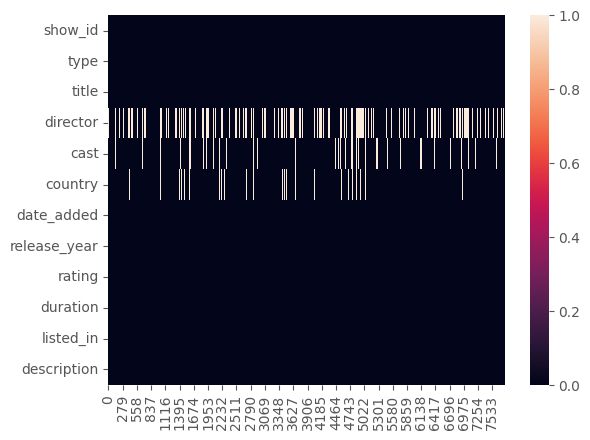

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isna().transpose())

### What did you know about your dataset?

*  There are 7787 observations and 12 columns.  
* There are some missing values found in column director,cast and country.  
* There are no duplicate values present in thid dataset.  
* The datatype of the most features are object.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


### Variables Description

**Show_id:** unique id foe each movie.  
**type:**    identifier(movie/TV show).   
**Title:**   Title of the movie/show.   
**director:**  Director of the show.   
**cast:**  actors involved.      
**country:**  Country of the  production.  
**date_added:** date it was added on netflix.   
**Year_release:**  Actual release year of the show.  
**ratings:**  TV ratings of the show.  
**duration:** Total duration in minutes or number of seasons.  
**listed_in:** Genre of the Movie/Show.   
**Description:** A brief description of the movie/show.  

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# converting date_added column to date datatype
df['date_added']=pd.to_datetime(df['date_added'],format='mixed')


In [ ]:
# adding month and year feature to our data
df['month_added']=df['date_added'].dt.month_name()
df['year_added']=df['date_added'].dt.year.convert_dtypes()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
 12  month_added   7777 non-null   object        
 13  year_added    7777 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(11)
memory usage: 859.4+ KB


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020


### What all manipulations have you done and insights you found?

I have changed date_added column into datetime format and extracted month and year from the feature.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Exploring motion picture categories.

In [ ]:
df['type'].value_counts()

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

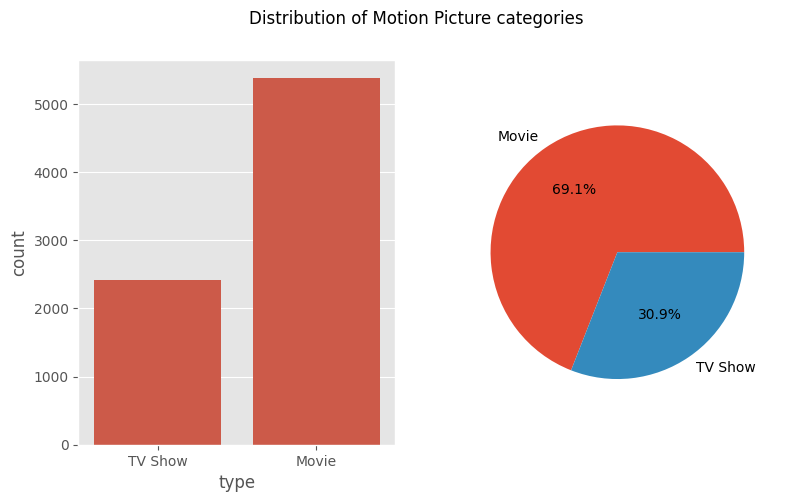

In [ ]:
# different types of items
fig,ax=plt.subplots(1,2,figsize=(9,5))
sns.countplot(x='type',data=df,ax=ax[0])
ax[1].pie(df['type'].value_counts(),labels=['Movie','TV Show'],autopct='%.1f%%')
fig.suptitle('Distribution of Motion Picture categories')
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the distribution of movies and TV shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?

We see that more movies than TV shows in our dataset, around 69% of the items are movies while 31% items are TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Top Directors

In [ ]:
tv_directors=df[df['type']=='TV Show']['director'].str.split(', ').explode().value_counts(ascending=False)
movie_directors=df[df['type']=='Movie']['director'].str.split(', ').explode().value_counts(ascending=False)

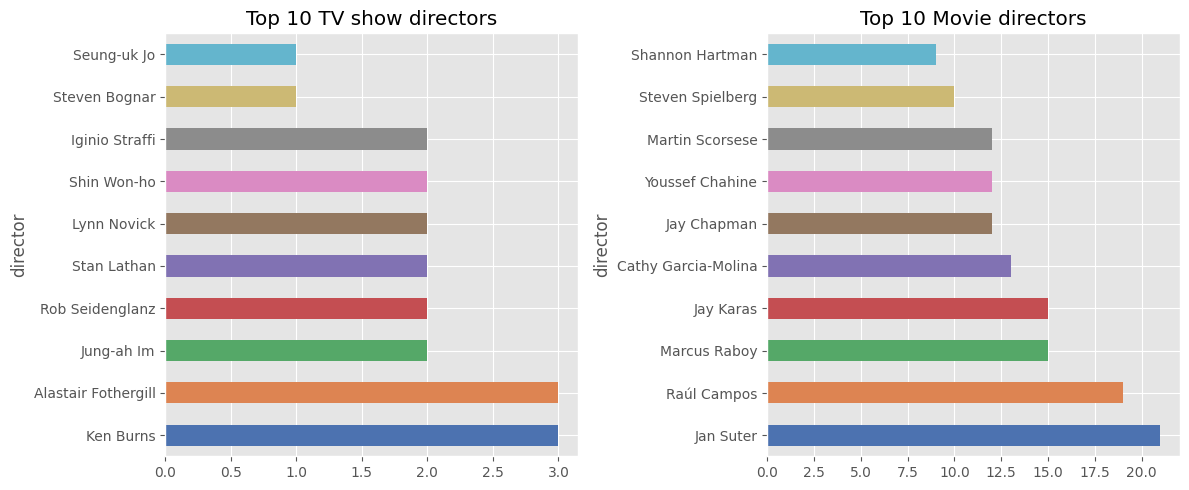

In [ ]:
# visualizing top 10 directors
color=sns.color_palette('deep')
fig,ax=plt.subplots(1,2,figsize=(12,5))
tv_directors[:10].plot(kind='barh',ax=ax[0],color=color)
ax[0].set_title("Top 10 TV show directors")
movie_directors[:10].plot(kind='barh',ax=ax[1],color=color)
plt.tight_layout()
ax[1].set_title("Top 10 Movie directors")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into top 10 directors of both movies and TV show

##### 2. What is/are the insight(s) found from the chart?

*  The top TV show directors in netflix are Alastair Fothergill, Ken Burns having directed 3 and 2 netflix TV shows .  

*  The top directors in the netflix who have directed movies are Jan Suter, Raul Campos having directed 21 and 19 movies respectively.  

#### Top Casts

In [ ]:
# Chart - 3 visualization code
df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [ ]:
# separating tv cast names
tv_cast_names=df[df['type']=='TV Show']['cast'].str.split(', ').explode().value_counts()

# separating movie cast names
movie_cast_names=df[df['type']=='Movie']['cast'].str.split(', ').explode().value_counts()


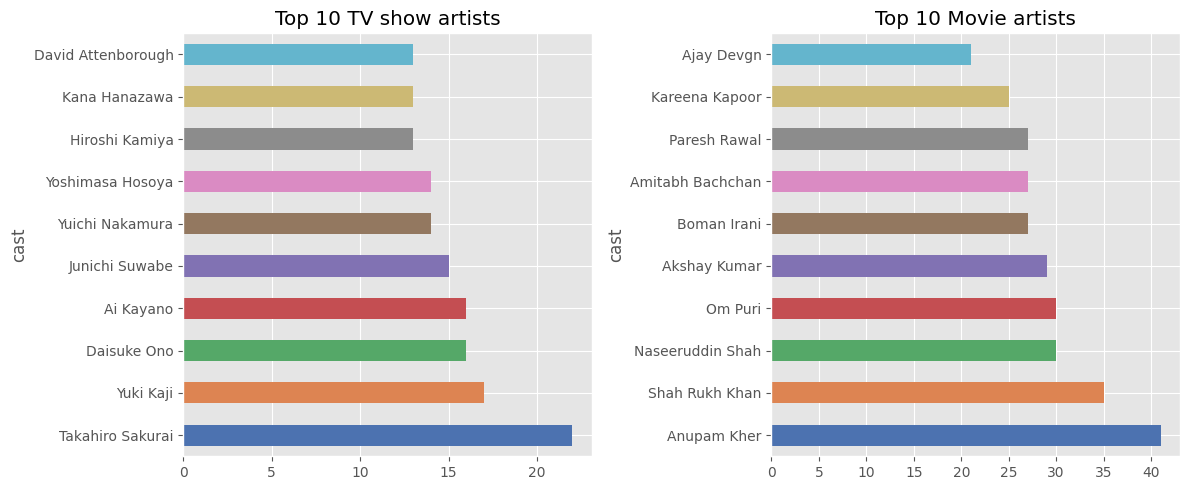

In [ ]:
# Visualizing top casts
color=sns.color_palette('deep')
fig,ax=plt.subplots(1,2,figsize=(12,5))
tv_cast_names[:10].plot(kind='barh',ax=ax[0],color=color)
ax[0].set_title("Top 10 TV show artists")
movie_cast_names[:10].plot(kind='barh',ax=ax[1],color=color)
plt.tight_layout()
ax[1].set_title("Top 10 Movie artists")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into top artists in both tv as well as movies featuring in Netflix.

##### 2. What is/are the insight(s) found from the chart?

* The top artists featuring in Netflix TV shows are **Takahiro Sakurai** and **Yuki Kaji** featuring 23 and 17 shows respectively.  

* The top artists featuring in Netflix movies are **Anupam Kher** and Shah Rukh Khan featuring 40 and 35 movies respectively.  

#### Distribution of Pictures based on country

In [ ]:
country_counts=df['country'].str.split(", ").explode()
country_counts=country_counts.value_counts()
country_counts.rename(index={'United States':'United States of America'},inplace=True)

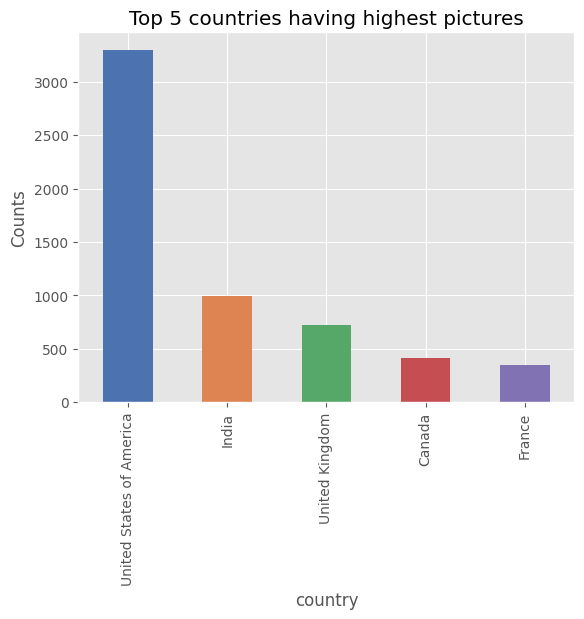

In [ ]:
# top 5 countries
country_counts[:5].plot(kind='bar',color=color)
plt.title("Top 5 countries having highest pictures")
plt.ylabel('Counts')
plt.show()

In [ ]:
# Visualizing the distribution using world map
worldmap=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data=pd.merge(worldmap,country_counts,left_on='name',right_index=True,how='left')
merged_data.rename(columns={'country':'counts'},inplace=True)
merged_data['counts']=merged_data['counts'].fillna(0)

# plotting
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='counts', linewidth=0.8,edgecolor='black',ax=ax,legend=True,cmap='gist_earth_r')
plt.title('Distribution of pictures based on countries')
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

##### 1. Why did you pick the specific chart?

We wanted to visualize distribution of movies/tv shows across various countries.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies or Tv shows are American, there are few Indian pictures followed by England, Canada and France.

#### Analyzing Titles of the Picture

In [ ]:
df['title'].tail()

7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, dtype: object

In [ ]:
text=' '.join(title for title in df['title'] )
word_cloud=WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

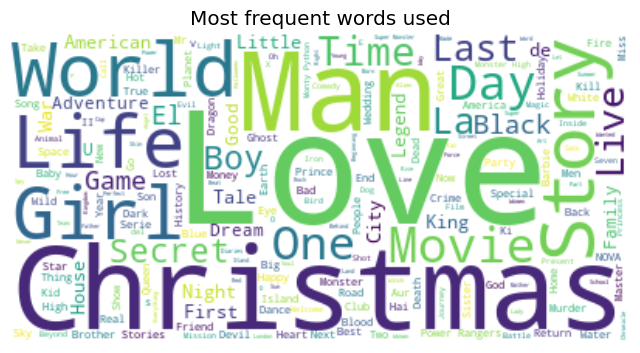

In [ ]:
# visualizing most frequent words
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words used")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see what are the frequent words used in the Movie/TV Show title for this dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we find that the most frequent words used in the dataset are **Love, World, Christmas, Man** etc. So we can expect that movies are based on Love, Christmas and so on.

#### Release year of the Picture

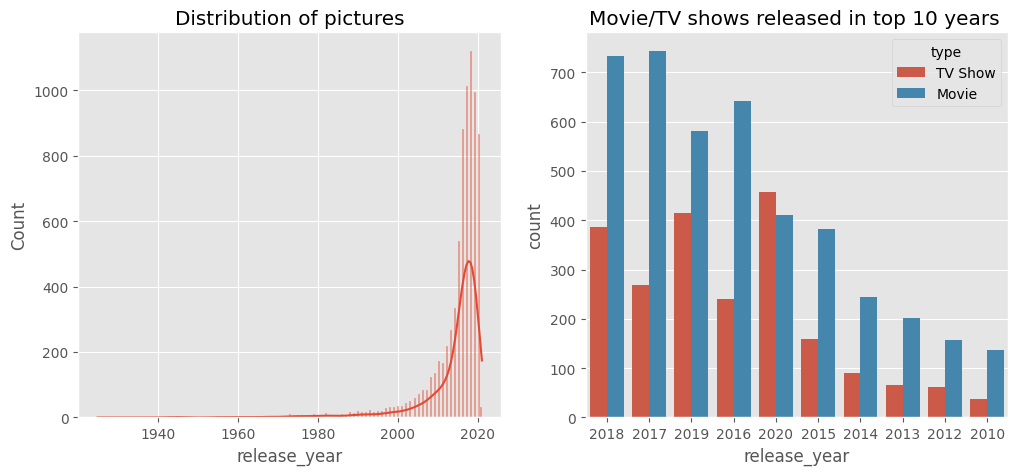

In [ ]:
# Distribution of pictures based on release year
fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(df['release_year'],kde=True,ax=ax[0])
ax[0].set_title("Distribution of pictures")
sns.countplot(x='release_year',hue='type',order=df['release_year'].value_counts()[:10].index,data=df,ax=ax[1])
ax[1].set_title("Movie/TV shows released in top 10 years ")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into distribution of Netflix movies and TV shows based on year.

##### 2. What is/are the insight(s) found from the chart?

We find that this Netflix primarily contains movies which are released in the year **2018, 2017, 2019, 2016, 2020**. There are very few old movies.

###**Ratings**

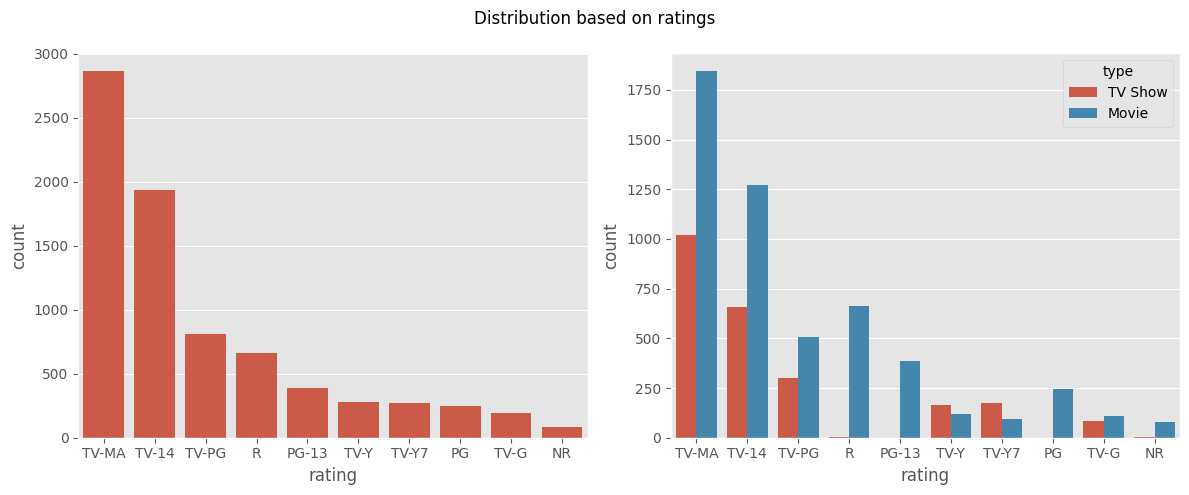

In [ ]:
# Distribution based on ratings

fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='rating',data=df,ax=ax[0],order=df['rating'].value_counts().index[:10])
sns.countplot(x='rating',hue='type',order=df['rating'].value_counts().index[:10],data=df,ax=ax[1])
fig.suptitle("Distribution based on ratings")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the rating distribution to our movies/tv shows in Netflix to understand for which audience this dataset belongs to.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we see that most of the pictures have ratings like **TV-MA, TV-14, TV-PG, which suggest that these shows are for mature audience**, and very few picture are meant for the kids.

#### **Movies/ TV show based on Generes.**

In [ ]:
mov_genres=df.loc[df['type']=='Movie']['listed_in'].str.split(", ").explode()

tv_genres=df.loc[df['type']=='TV Show']['listed_in'].str.split(", ").explode()
tv_genres

0             International TV Shows
0                          TV Dramas
0                TV Sci-Fi & Fantasy
5             International TV Shows
5                          TV Dramas
                    ...             
7779          International TV Shows
7779       Spanish-Language TV Shows
7779    Stand-Up Comedy & Talk Shows
7785          International TV Shows
7785                      Reality TV
Name: listed_in, Length: 5525, dtype: object

ValueError: cannot reindex on an axis with duplicate labels

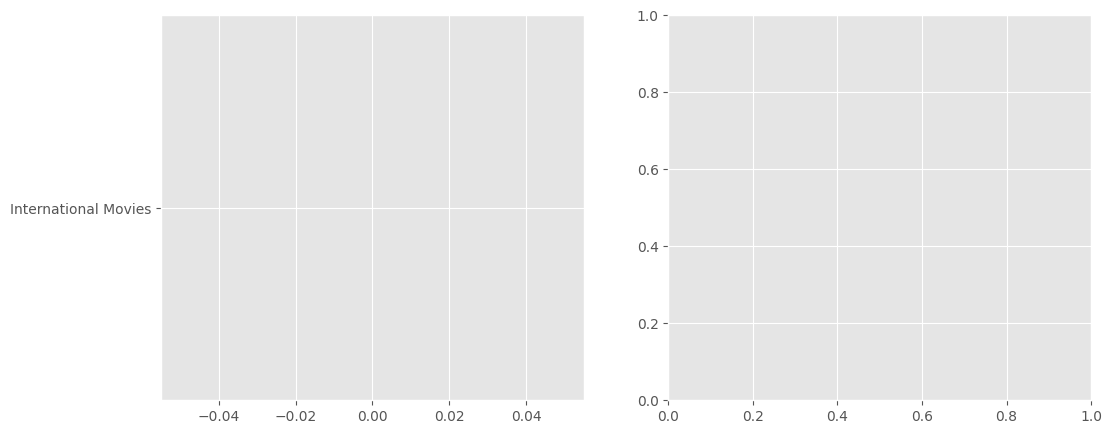

In [ ]:
# visualizing top genres for movie and tv shows
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(y=mov_genres,order=mov_genres.value_counts().index[:10],palette='Spectral_r',ax=ax[0])
ax[0].set_title("Top 10 Movie Genres")
ax[0].set_ylabel("")
sns.countplot(y=tv_genres,order=tv_genres.value_counts().index[:10],palette='Spectral_r',ax=ax[1])
ax[1].set_title("Top 10 TV genres")
ax[1].set_ylabel("")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see what are the top genres for Movies and TV shows that people prefer.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we find that people in genral like **international movies and shows followed by drama and comedy.**

#### **Analyzing description of Movies and Tv shows**

In [ ]:
text=' '.join(words for words in df['description'] )
word_cloud=WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

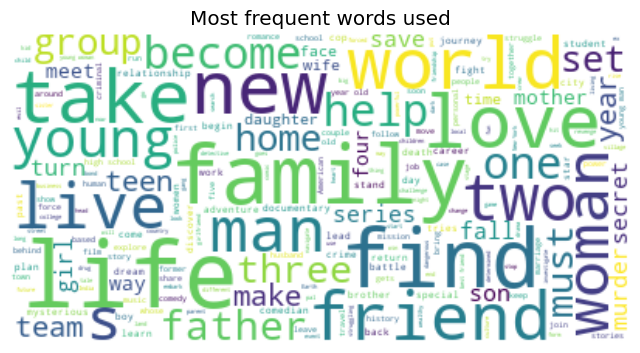

In [ ]:
# visualizing most frequent words

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words used")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the most frequent used in the decription of a movie or tv show.

##### 2. What is/are the insight(s) found from the chart?

The most frequent words are **family, friend, life, love, world**  etc. This suggests that plot of the majority movie or tv show might revolve around family, friend, life, love, world.

## ***5. Feature Engineering & Data Pre-processing***

In [ ]:
# creating copy
netflix_df=df.copy()

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
month_added       10
year_added        10
dtype: int64

We see lot of missing values in column director, cast, country.

In [ ]:
# handling missing values in director, cast, country
netflix_df[['director','cast','country']]=netflix_df[['director','cast','country']].fillna('')

# dropping missing values in date_added release_year
netflix_df=netflix_df.dropna(subset=['date_added','rating'])

In [ ]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have replaced the missing value in director, cast, country as unknown and we have dropped the missing values in date_added and ratings.

### 2. Handling Outliers

In [ ]:
# let us look at our numerical columns
num_col=df.describe().columns
num_col


Index(['date_added', 'release_year', 'year_added'], dtype='object')

In [ ]:
df['year_added']

0       2020
1       2016
2       2018
3       2017
4       2020
        ... 
7782    2020
7783    2019
7784    2020
7785    2020
7786    2020
Name: year_added, Length: 7787, dtype: Int64

Text(0.5, 0.98, 'Outliers in numeric columns')

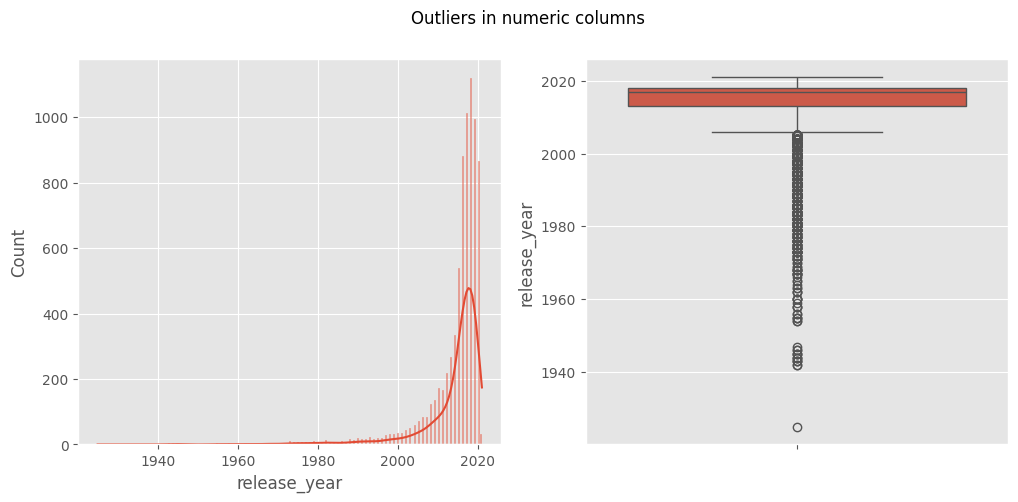

In [ ]:
# plotting these two numeric variables
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["release_year"],kde=True,ax=ax[0])
sns.boxplot(y=df['release_year'],ax=ax[1])
fig.suptitle("Outliers in numeric columns")


##### What all outlier treatment techniques have you used and why did you use those techniques?

Since there are only two numeric columns, rest are text data, and we won't need the numeric data for our clustering analysis, so we let the outliers be as it is.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
ratings = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
netflix_df['rating']=netflix_df['rating'].map(ratings)

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have decoded the ratings into very simple classification so that it would be easy to segment the movies and tv shows.

### 4. **Textual Data Preprocessing**
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'year_added'],
      dtype='object')

In [ ]:
netflix_df['director'].head()

0                     
1    Jorge Michel Grau
2         Gilbert Chan
3          Shane Acker
4       Robert Luketic
Name: director, dtype: object

In [ ]:
# merging the sub-names of the director to form a single string

def director_merge(name):
  merge_name=[]
  for word in name.split(" "):
    merge_name.append(word)
  merge_name=''.join(merge_name)
  return merge_name

netflix_df['director']=netflix_df['director'].apply(director_merge)

In [ ]:
netflix_df['director'].head()

0                   
1    JorgeMichelGrau
2        GilbertChan
3         ShaneAcker
4      RobertLuketic
Name: director, dtype: object

In [ ]:
netflix_df['cast'].head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

In [ ]:
# similary merging the individual artists name to form a single string for a unique artist

def merging_names(text):
  new_text=[]
  for name in text.split(', '):
    new_name=name.replace(" ","")
    new_text.append(new_name)
  new_text=", ".join(new_text)
  return new_text
merging_names(netflix_df['cast'][0])
netflix_df['cast']=netflix_df['cast'].apply(merging_names)
netflix_df['cast'].head()

0    JoãoMiguel, BiancaComparato, MichelGomes, Rodo...
1    DemiánBichir, HéctorBonilla, OscarSerrano, Aza...
2    TeddChan, StellaChung, HenleyHii, LawrenceKoh,...
3    ElijahWood, JohnC.Reilly, JenniferConnelly, Ch...
4    JimSturgess, KevinSpacey, KateBosworth, AaronY...
Name: cast, dtype: object

#### 1. Expand Contraction

In [ ]:
# combining all the relevent text features which is necessary for clustering analysis

netflix_df['combined_text']=netflix_df['director']+' '+ netflix_df['cast']+ " "+ netflix_df['rating']+ ' ' \
                                 +netflix_df['listed_in']+ ' ' + netflix_df['description']

In [ ]:
netflix_df['combined_text'][0]

' JoãoMiguel, BiancaComparato, MichelGomes, RodolfoValente, VanezaOliveira, RafaelLozano, VivianePorto, MelFronckowiak, SergioMamberti, ZezéMotta, CelsoFrateschi Adults International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 2. Lower Casing

In [ ]:
# Lower Casing
def lower_casing(text):
  text=text.lower()
  return text
netflix_df['combined_text']=netflix_df['combined_text'].apply(lower_casing)

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuations(text):
  text=re.sub(r'[^\w\s]','',text)
  return text
netflix_df['combined_text']=netflix_df['combined_text'].apply(remove_punctuations)

#### 4. Removing URLs & Removing words which contain digits

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_url(text):
  text=re.sub(r'https?\S+|www\S+','',text) # removing urls
  text=re.sub(r'\w*\d+\w*','',text) # removing words which contain digits
  return text
netflix_df['combined_text']=netflix_df['combined_text'].apply(remove_url)

In [ ]:
netflix_df['combined_text'][0]

' joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi adults international tv shows tv dramas tv scifi  fantasy in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor'

#### 5. Removing Stopwords

In [ ]:

nltk.download('stopwords')
sw=stopwords.words('english')
np.array(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# Remove Stopwords
def remove_stopwords(text):
  new_text=[words for words in text.split() if words not in sw]
  new_text=' '.join(new_text)
  return new_text
netflix_df['combined_text']= netflix_df['combined_text'].apply(remove_stopwords)
netflix_df['combined_text'][0]

'joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi adults international tv shows tv dramas tv scifi fantasy future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### 6. Lemmatization

In [ ]:
nltk.download('wordnet')

NameError: name 'nltk' is not defined

In [ ]:
def lemmatizer(text):
  lemmatizer=WordNetLemmatizer()
  lemmas=[]
  for word in text.split():
    lemma=lemmatizer.lemmatize(word,pos='v')
    lemmas.append(lemma)
  new_text=' '.join(lemmas)
  return new_text
netflix_df['combined_text']=netflix_df['combined_text'].apply(lemmatizer)


In [ ]:
netflix_df['combined_text'][0]

'joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi adults international tv show tv dramas tv scifi fantasy future elite inhabit island paradise far crowd slum get one chance join save squalor'

**The following steps we have done above for text preprocessing are:**  
**Step-1:** We combine all the relevent text features in the dataset into new feature called **combined_text**.    
**Step-2:** We convert all the upper cases in combined_text to lower case.  
**Step-3:** We remove all punctuations present in combined_text.  
**Step-4:** We remove all URL's and words which contain digits.  
**Step-5:** We remove all the Stopwords in the combined_text.  
**Step-6:** We do Lemmatization on combined_text this converts all the synonyms of a word into one root word.

#### 7. Tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
tokenized_data=netflix_df['combined_text'].copy()

In [ ]:
# Tokenization
tokenized_data=tokenized_data.apply(word_tokenize)
tokenized_data[45]

['alicanyücesoy',
 'melisasözen',
 'musauzunlar',
 'serkanercan',
 'özkanuğur',
 'ülküduru',
 'tansubiçer',
 'nadirsarıbacak',
 'sermetyeşil',
 'ayhankavas',
 'adults',
 'crime',
 'tv',
 'show',
 'international',
 'tv',
 'show',
 'tv',
 'dramas',
 'orphan',
 'subject',
 'test',
 'give',
 'superpowers',
 'rescue',
 'raise',
 'istanbuls',
 'streets',
 'fall',
 'reporter',
 'link',
 'past']

In [ ]:
tokenized_data[0]

['joãomiguel',
 'biancacomparato',
 'michelgomes',
 'rodolfovalente',
 'vanezaoliveira',
 'rafaellozano',
 'vivianeporto',
 'melfronckowiak',
 'sergiomamberti',
 'zezémotta',
 'celsofrateschi',
 'adults',
 'international',
 'tv',
 'show',
 'tv',
 'dramas',
 'tv',
 'scifi',
 'fantasy',
 'future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowd',
 'slum',
 'get',
 'one',
 'chance',
 'join',
 'save',
 'squalor']

#### 8. Text Vectorization

In [ ]:
# TF-IDF

vectorizer = TfidfVectorizer(lowercase=False,max_features=10000)
X = vectorizer.fit_transform(netflix_df['combined_text'])

In [ ]:
X=X.toarray()

In [ ]:
vectorizer.get_feature_names_out()[:30]

array(['aakashdabhade', 'aamirbashir', 'aamirkhan', 'aaron',
       'aaronabrams', 'aaroneckhart', 'aaronjeffery', 'aaronpaul',
       'aaronyan', 'aasifmandvi', 'abandon',
       'abbasalibhaiburmawallamastanalibhaiburmawalla', 'abbey',
       'abbiecornish', 'abbydonnelly', 'abbytrott', 'abdalahmishrif',
       'abdelaziznmila', 'abdelilahwahbi', 'abduct', 'abduction',
       'abductors', 'abdurrahmanarif', 'abhaydeol', 'abhaymahajan',
       'abhimanyusingh', 'abhinaydeo', 'abhishekbachchan',
       'abhishekbanerjee', 'abhishekchaubey'], dtype=object)

##### Which text vectorization technique have you used and why?

Here we have used TF-IDF vectorization technique, it is the best technique as it gives more importance to less frequent words, and less importance to high frequent words.

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimension reduction is needed as there are **more than 20000 features** and when we do clustering analysis of this many dimensions our program would crash.

In [ ]:
# DImensionality Reduction (If needed)

pca=PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)


[1.47260259e-02 6.25779790e-03 5.68095574e-03 ... 9.87279585e-35
 8.60593515e-35 8.25429233e-35]


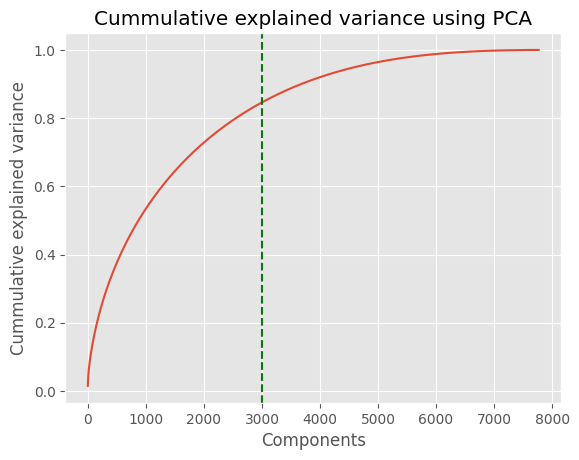

In [ ]:
# plotting to see explained variance

plt.axvline(x=3000,color='g',linestyle='--')
plt.xlabel("Components")
plt.ylabel("Cummulative explained variance")
plt.title("Cummulative explained variance using PCA")
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA to reduce the dimension of the dataset, from the above plot we find that about 3000 components could explain about 80% of the variance.

In [ ]:
# using pca to reduce dimensions
pca=PCA(n_components=3000, random_state=0)
X_pca=pca.fit_transform(X)

In [ ]:
X_pca.shape

(7770, 3000)

## ***6. ML Model Implementation***

###**K Means**

In [ ]:

# Elbow method to determine the best value of n_clusters

sse=[]
for k in range(1,16):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
  kmeans.fit(X_pca)
  sse.append(kmeans.inertia_)



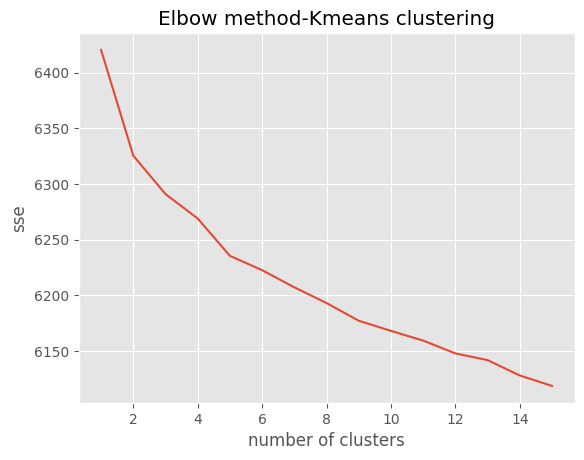

In [ ]:
# plotting sse to find optimal k value
plt.plot(range(1,16),sse)
plt.xlabel('number of clusters')
plt.ylabel('sse')
plt.title("Elbow method-Kmeans clustering")
plt.show()

From the above plot we see that as number of clusters increases the sse value decreases, it is difficult to point out the elbow from the above curve. We need a better method to find out the best value of number of clusters.

In [ ]:
# silhoutte method to find best value of k
sil_score=[]
for k in range(2,16):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
  kmeans.fit(X_pca)
  label=kmeans.labels_
  sil_score.append(silhouette_score(X_pca, label))


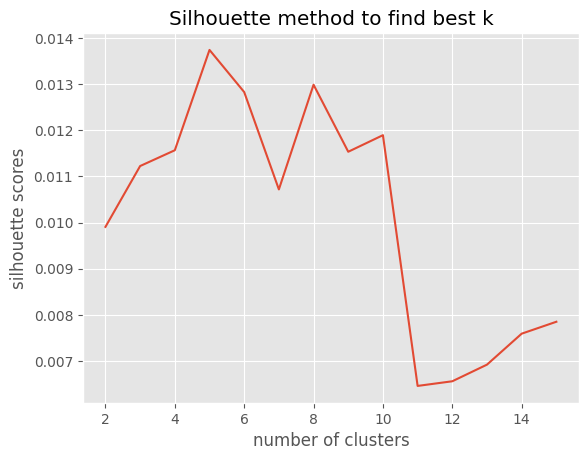

In [ ]:
# plotting silhouette scores for different clusters
plt.plot(range(2,16),sil_score)
plt.xlabel('number of clusters')
plt.ylabel('silhouette scores')
plt.title('Silhouette method to find best k')
plt.show()

The number of clusters is determined for which silhouette score is maximum, from the above plot we find that the silhouette score is maximum for k=6, hence the number of clusters which we should choose for this problem is 6.

In [ ]:
# clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
kmeans.fit(X_pca)

KMeans(n_clusters=6, random_state=0)

In [ ]:
# evaluation metric
kmeans_sse = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

In [ ]:
print("sse for 6 clusters is:",kmeans_sse)
print("silhouette_score for 6 clusters is",kmeans_silhouette_score)

sse for 6 clusters is: 6222.604527766267
silhouette_score for 6 clusters is 0.0128257210286582


In [ ]:
# labelling the dataset
    kmeans.labels_
    netflix_df['clustering_label']=kmeans.labels_
    netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,combined_text,clustering_label
2392,s2393,Movie,Ghanchakkar,RajKumarGupta,"EmraanHashmi, VidyaBalan, RajeshSharma, NamitD...",India,2018-11-01,2013,Adults,129 min,"Comedies, International Movies, Thrillers",Former con artist Sanju surrounds himself with...,November,2018,rajkumargupta emraanhashmi vidyabalan rajeshsh...,0
1451,s1452,Movie,Coffee for All,"FluvioIannuci,RolySantos",,"Italy, United States, Argentina",2018-05-01,2017,Older Kids,69 min,"Documentaries, International Movies","In Naples, Buenos Aires and New York, people r...",May,2018,fluvioiannucirolysantos older kid documentarie...,5
295,s296,Movie,Across Grace Alley,RalphMacchio,"BenHyland, MarshaMason, KarinaSmirnoff, ColinB...",United States,2016-12-01,2013,Older Kids,24 min,Dramas,"A young boy, upset by his parents' divorce, be...",December,2016,ralphmacchio benhyland marshamason karinasmirn...,5
6931,s6932,Movie,The Time Traveler's Wife,RobertSchwentke,"RachelMcAdams, EricBana, ArlissHoward, RonLivi...",United States,2019-10-01,2009,Teens,107 min,"Dramas, Romantic Movies, Sci-Fi & Fantasy","Due to a genetic disorder, handsome librarian ...",October,2019,robertschwentke rachelmcadams ericbana arlissh...,0
3597,s3598,Movie,Lembi 8 Giga,AshrafFayeq,"MohamedSaad, MaiEzzEl-Din, HassanHosny, Yousse...",,2020-04-28,2010,Adults,111 min,"Comedies, International Movies","To upgrade his life, a simple man fakes his cr...",April,2020,ashraffayeq mohamedsaad maiezzeldin hassanhosn...,0


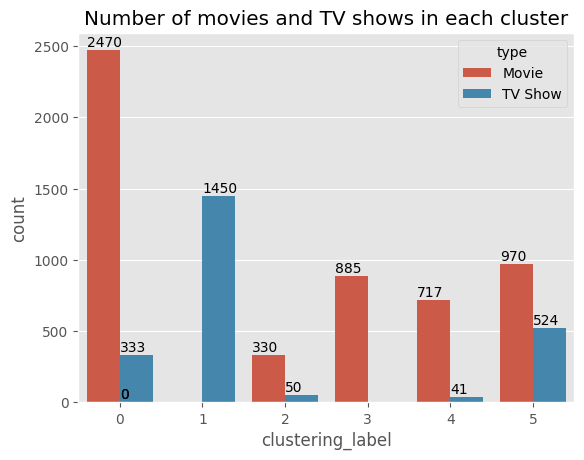

In [ ]:
# visualizing cluster distribution
bars=sns.countplot(x='clustering_label',data=netflix_df,hue='type')
plt.title("Number of movies and TV shows in each cluster")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 25, format(yval,'.0f'))

#### **Analyzing key content present in clusters.**

In [ ]:
def kmeans_wordcloud(cluster_num):
  content_df=netflix_df[netflix_df['clustering_label']==cluster_num]['description']
  description_words=[]
  for text in content_df:
    for words in text.split():
      description_words.append(words)

  new_text=' '.join(description_words)
  word_cloud=WordCloud(stopwords=STOPWORDS,background_color='white').generate(new_text)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


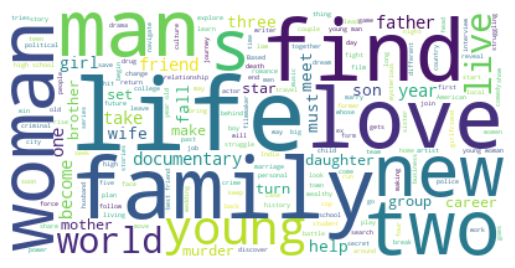

In [ ]:
# key content in cluster 0
kmeans_wordcloud(0)

In [ ]:
netflix_df[netflix_df['clustering_label']==0].sample(8)[['title','rating','listed_in']]

,title,rating,listed_in
1084,Break,Adults,"Comedies, Dramas, International Movies"
1156,Bye Bye London,Young Adults,"Comedies, Dramas, International Movies"
6565,The Last O.G.,Adults,TV Comedies
1989,Emicida: AmarElo - It’s All For Yesterday,Adults,"Documentaries, International Movies, Music & M..."
3249,Just Friends,Teens,"Comedies, Romantic Movies"
547,Antar: Son of Shadad,Adults,"Comedies, International Movies"
4789,Patiala House,Older Kids,"Dramas, International Movies, Sports Movies"
5117,Real Rob,Adults,TV Comedies


From the above wordcloud for cluster 0, we see that frequent words include words like **friend, world, new, adventure, kid, etc.** We also looked into the ratings and genre of the movies and shows which belong to cluster 0, from these two we can conclude that **most of the movies and shows in this cluster are for kids.**

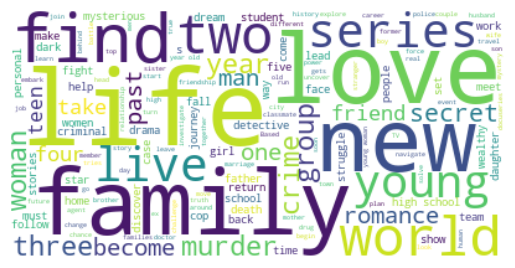

In [ ]:
# key content in cluster 1
kmeans_wordcloud(1)

In [ ]:
netflix_df[netflix_df['clustering_label']==1].sample(8)[['title','rating','listed_in']]

,title,rating,listed_in
686,Bad Boy Billionaires: India,Young Adults,"British TV Shows, Docuseries, International TV..."
324,After Life,Adults,"British TV Shows, International TV Shows, TV C..."
4337,My Mister,Adults,"Crime TV Shows, International TV Shows, Korean..."
2569,Ha Unlimited,Adults,"International TV Shows, TV Comedies"
3406,Kings of Jo'Burg,Adults,"Crime TV Shows, International TV Shows, TV Dramas"
4671,Operation Ouch!,Older Kids,"British TV Shows, Kids' TV, TV Comedies"
4800,Paul Hollywood's Big Continental Road Trip,Young Adults,"British TV Shows, Docuseries, International TV..."
2998,Ingobernable,Adults,"Crime TV Shows, International TV Shows, Spanis..."


From the above wordcloud for cluster 1, we see that frequent words include words like **life, find, family, love, men, women.** We also looked into the ratings and genre of the movies and shows which belong to cluster 1, from these two and wordcloud we can conclude that **most of the movies and shows in this cluster are dramas, thrillers and horrors.**

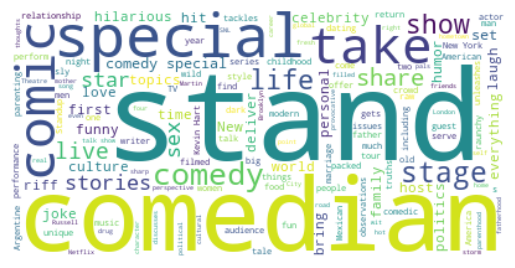

In [ ]:
# key content in cluster 2
kmeans_wordcloud(2)

In [ ]:
netflix_df[netflix_df['clustering_label']==2].sample(8)[['title','rating','listed_in']]

,title,rating,listed_in
4797,Patton Oswalt: I Love Everything,Adults,"Stand-Up Comedy & Talk Shows, TV Comedies"
578,Ari Shaffir: Double Negative,Adults,Stand-Up Comedy & Talk Shows
7221,Trigger Warning with Killer Mike,Adults,"Docuseries, Stand-Up Comedy & Talk Shows"
1629,Dave Chappelle,Adults,"Stand-Up Comedy & Talk Shows, TV Comedies"
2086,Fabrizio Copano: Solo pienso en mi,Adults,Stand-Up Comedy
6232,The Comedy Lineup,Adults,"Stand-Up Comedy & Talk Shows, TV Comedies"
5196,Ricardo O'Farrill: Abrazo navideño,Adults,Stand-Up Comedy
4778,Park Na-rae: Glamour Warning,Adults,Stand-Up Comedy


From the above wordcloud for cluster 2, we see that frequent words include words like **Comedy and stand.** We also looked into the ratings and genre of the movies and shows which belong to cluster 2, from these two and wordcloud we can conclude that **most of the movies and shows are comedy and stand up comedy shows**

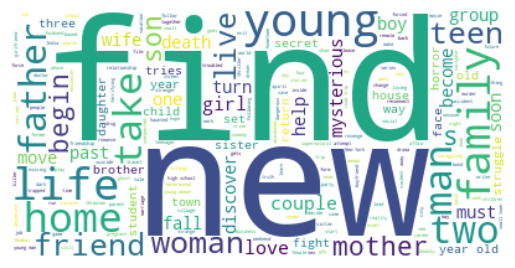

In [ ]:
# key content in cluster 3
kmeans_wordcloud(3)

In [ ]:
netflix_df[netflix_df['clustering_label']==3].sample(8)[['title','rating','listed_in']]

,title,rating,listed_in
833,Beneath the Leaves,Adults,"Independent Movies, Thrillers"
27,#Alive,Adults,"Horror Movies, International Movies, Thrillers"
6624,The Lovers,Adults,"Comedies, Dramas, Independent Movies"
3797,"LSD: Love, Sex Aur Dhokha",Adults,"Dramas, Independent Movies, International Movies"
2413,Gimme Shelter,Teens,"Dramas, Independent Movies"
1469,Come Sunday,Young Adults,"Dramas, Faith & Spirituality, Independent Movies"
5160,Rencor tatuado,Adults,"Dramas, Independent Movies, International Movies"
6216,The Chosen Ones,Adults,"Dramas, Independent Movies, International Movies"


From the above wordcloud for cluster 3, we see that frequent words include words like **find, must, two, take, world.** We also looked into the ratings and genre of the movies and shows which belong to cluster 3, from these two and wordcloud we can conclude that **most of the movies and shows in this cluster are Action and adventure based movies and shows.**

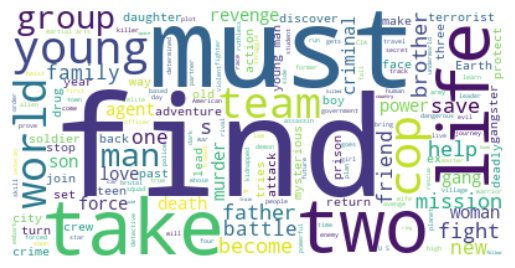

In [ ]:
# key content in cluster 4
kmeans_wordcloud(4)

In [ ]:
netflix_df[netflix_df['clustering_label']==4].sample(8)[['title','rating','listed_in']]

,title,rating,listed_in
1647,DC's Legends of Tomorrow,Young Adults,"TV Action & Adventure, TV Sci-Fi & Fantasy"
4404,Naruto,Young Adults,"Anime Series, International TV Shows"
1721,Detention Letter,Young Adults,"Action & Adventure, International Movies"
4561,Occupation,Adults,"Action & Adventure, Sci-Fi & Fantasy"
6568,The Last Runway,Adults,"Action & Adventure, International Movies"
5808,Steel Rain,Adults,"Action & Adventure, Dramas, International Movies"
6015,Teenage Mutant Ninja Turtles: The Movie,Older Kids,"Action & Adventure, Comedies"
6047,The 100,Young Adults,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ..."


From the above wordcloud for cluster 4, we see that frequent words include words like **documentary, history, life** We also looked into the ratings and genre of the movies and shows which belong to cluster 4, from these two and wordcloud we can conclude that **most of the movies and shows in this cluster are documentary based movies and shows.**

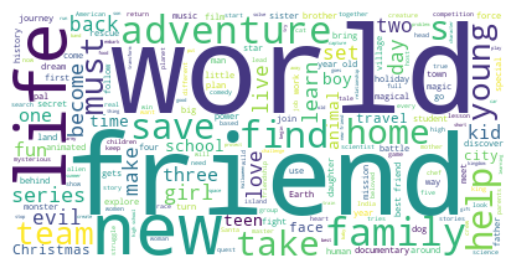

In [ ]:
# key content in cluster 5
kmeans_wordcloud(5)

In [ ]:
netflix_df[netflix_df['clustering_label']==5].sample(8)[['title','rating','listed_in']]

,title,rating,listed_in
7490,Water & Power: A California Heist,Older Kids,Documentaries
4125,Mirror Mirror,Older Kids,"Children & Family Movies, Comedies"
186,A Holiday Engagement,Kids,"Children & Family Movies, Comedies, Romantic M..."
2896,I Am Mother,Older Kids,"International Movies, Sci-Fi & Fantasy, Thrillers"
4863,Pinkfong & Baby Shark's Space Adventure,Kids,Children & Family Movies
325,After Maria,Older Kids,Documentaries
2300,Frozen Planet: On Thin Ice,Older Kids,Movies
6935,The Trader (Sovdagari),Older Kids,"Documentaries, International Movies"


From the above wordcloud for cluster 5, we see that frequent words include words like **love, life, family.** We also looked into the ratings and genre of the movies and shows which belong to cluster 5, from these two and wordcloud we can conclude that **most of them are romantic movies and shows.**

#### KMeans Summary

In our first ML model implementation we have formed a total of 6 clusters, each of the clusters contain specific group of movies and shows.  

**Cluster 0:** This cluster contains lot of **cartoons and animes** which are for kids.  
**Cluster 1:** This cluster contains lot of **dramas, thriller and horror** movies and shows.  
**Cluster 2:** This cluster contains lot of **comedy and standup comedies**.  
**Cluster 3:** This cluster contains lot of **action and adventure movies and shows.**  
**Cluster 4:** This cluster contains lot of **documentary and docuseries.**  
**Cluster 5:** This cluster contains lot of **Romantic movies and shows.**

### **Hierarchial clustering**

In [ ]:
# plotting dendogram to determine optimum clusters

Z = linkage(X_pca, method='ward')


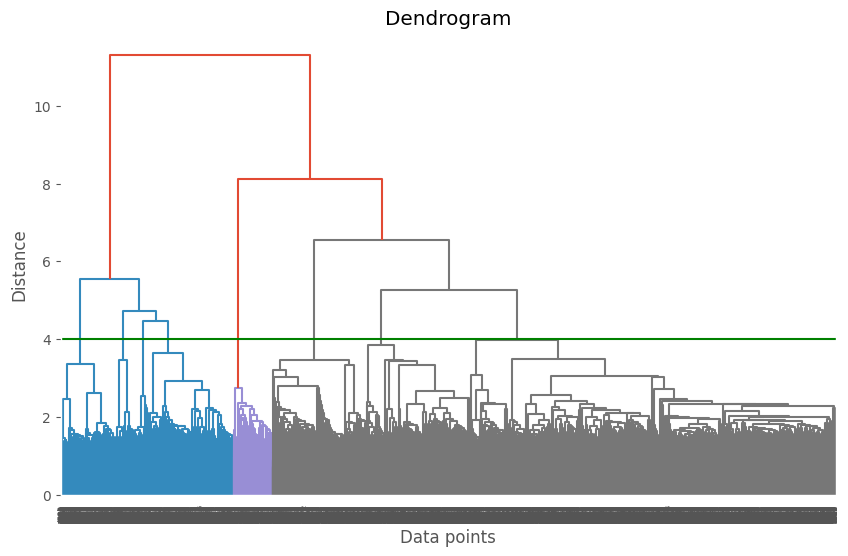

In [ ]:
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.axhline(y=4,color='green')
plt.title('Dendrogram')
plt.show()

From the Dendogram above the **we see that at distance=4 seems to be optimal cut point**, and we get a total of **9 clusters** based on that cut point.

In [ ]:
# implementing agglomerative clustering

agg_model = AgglomerativeClustering(n_clusters=9, linkage='ward', affinity='euclidean')
agg_model.fit(X_pca)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
agg_model.labels_
netflix_df['hierc_cluster_label']=agg_model.labels_
netflix_df.sample(5)

In [ ]:
bars=sns.countplot(x='hierc_cluster_label',data=netflix_df,hue='type')
plt.title("Number of movies and TV shows in each cluster")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 30, format(yval,'.0f'))

1. First we have found our optimal number of clusters which is 9.  
2. After first step we have implemented **agglomerative clustering with ward linkage.**
3. We have plotted the distribution of movies and tv shows for each of these clusters.  

In [ ]:
def hierachial_wordcloud(cluster_num):
  content_df=netflix_df[netflix_df['hierc_cluster_label']==cluster_num]['description']
  description_words=[]
  for text in content_df:
    for words in text.split():
      description_words.append(words)

  new_text=' '.join(description_words)
  word_cloud=WordCloud(stopwords=STOPWORDS,background_color='white').generate(new_text)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


#### **Looking to understand the content present in the clusters**

In [ ]:
# key content in cluster 0
hierachial_wordcloud(0)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==0].sample(8)[['title','rating','listed_in']]

From the above wordcloud for cluster 0, we see that frequent words include words like **documentary, world, career, life** We also looked into the ratings and genre of the movies and shows which belong to cluster 0, from these two and wordcloud we can conclude that **most of them are documentary or docuseries.**

In [ ]:
# key content in cluster 1
hierachial_wordcloud(1)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==1].sample(8)[['title','rating','listed_in']]

From the above wordcloud for cluster 1, we see that frequent words include words like **friend, adventure, world, save, find** We also looked into the ratings and genre of the movies and shows which belong to cluster 1, from these two and wordcloud we can conclude that **most of them are cartoons and animes for kids**

In [ ]:
# key content in cluster 2
hierachial_wordcloud(2)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==2].sample(8)[['title','rating','listed_in']]

From the above wordcloud for cluster 2, we see that frequent words include words like **love, life, family, find, man, women.** We also looked into the ratings and genre of the movies and shows which belong to cluster 2, from these two and wordcloud we can conclude that **it is a mixture of comedy, drama, family, documentary**. It basically contains movies and shows which are related to **life and family**.

In [ ]:
# key content in cluster 3
hierachial_wordcloud(3)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==3].sample(8)[['title','rating','listed_in']]

From the above wordcloud for cluster 3, we see that frequent words include words like **life, family, high school, love, world** We also looked into the ratings and genre of the movies and shows which belong to cluster 5, from these two and wordcloud we can conclude that **this cluster in majority contains movies and shows about things around high school stuff more for teens and young adults.**

In [ ]:
# key content in cluster 4
hierachial_wordcloud(4)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==4].sample(8)[['title','rating','listed_in']]

From the above wordcloud for cluster 4, we see that frequent words include words like **documentary and docuseries.** We also looked into the ratings and genre of the movies and shows which belong to cluster 4, from these two and wordcloud we can conclude that **most of them are docuseries more based towards nature.**

In [ ]:
# key content in cluster 5
hierachial_wordcloud(5)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==5].sample(8)[['title','rating','listed_in']]

From the above wordcloud for cluster 5, we see that frequent words include words like **comic, comedian, stand up** We also looked into the ratings and genre of the movies and shows which belong to cluster 5, from these two and wordcloud we can conclude that **this cluster majorly contains comedy movies and shows.**

In [ ]:
# key content in cluster 6
hierachial_wordcloud(6)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==6].sample(8)[['title','rating','listed_in']]

From the above wordcloud for cluster 5, we see that frequent words include words like **team, young, must** We also looked into the ratings and genre of the movies and shows which belong to cluster 5, from these two and wordcloud we can conclude that **this cluster in majority contains action and adventure movies and shows.**

In [ ]:
# key content in cluster 7
hierachial_wordcloud(7)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==7].sample(8)[['title','rating','listed_in']]

From the above wordcloud for cluster 6, we see that frequent words include words like **love, life, find.** We also looked into the ratings and genre of the movies and shows which belong to cluster 6, from these two and wordcloud we can conclude that **most of the, are romantic movies and shows.**

In [ ]:
# key content in cluster 8
hierachial_wordcloud(8)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==8].sample(8)[['title','rating','listed_in']]

From the above wordcloud for cluster 8, we see that frequent words include words like **young, world, demon, girl.** We also looked into the ratings and genre of the movies and shows which belong to cluster 8, from these two and wordcloud we can conclude that **this cluster in majority contains anime series and movies.**

### **Hierarchial clustering summary**

In Agglomerative clustering implementation we have formed a total of 9 clusters, each of the clusters contain specific group of movies and shows.  

**Cluster 0:** This cluster contains lot of **documentary movies**.  
**Cluster 1:** This cluster contains lot of **cartoon and animes** for kids.  
**Cluster 2:** This cluster contains movies and tv shows which focuses about **life and family.**  
**Cluster 3:** This cluster contains **high school drama and thriller**.  
**Cluster 4:** This cluster contains lot of **documentary and docuseries based on crime**.  
**Cluster 5:** This cluster contains lot of **Comedy movies and shows**.   
**Cluster 6:** This cluster contains lot of **Action and Adventure movies.**   
**Cluster 7:** This cluster contains **romantic movies and tv shows.**

### **Recommendation system**

* In Recommendation system we input one movie and it will recommend 10 similar movies or tv shows to our input movie, we use **Content based recommendation** system and use **cosine similarlity** to compute similarity scores between two items.  

* Here we will build a recommender system which will recommend 10 similar movies or shows to our input movie.

In [ ]:
recommender_df=netflix_df.copy()

In [ ]:
recommender_df['combined_text']

In [ ]:
recommender_df.shape

In [ ]:
recommender_df=recommender_df[['title','combined_text']]
recommender_df.head()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim=cosine_similarity(X_pca)
print(cosine_sim)

In [ ]:
cosine_sim.shape

In [ ]:
recommender_df.reset_index(inplace=True)

In [ ]:
def recommend_movies(movie):
  try:
    index=recommender_df.loc[recommender_df['title'].str.lower()== movie.lower()].index[0]
    similar_movies=cosine_sim[index]
    similar_movies_ind=np.argsort(similar_movies)[::-1]
    similar_movies_index=similar_movies_ind[1:11]
    recommended_movies=recommender_df.loc[similar_movies_index,'title']
    print(f'If you liked {movie} you may like :')
    print()
    for movies in recommended_movies:
      print(movies)
  except:
    print('invalid entry')


In [ ]:
recommend_movies('Narcos')

In [ ]:
recommend_movies('The Vampire Diaries')

In [ ]:
recommend_movies("Breaking Bad")

In [ ]:
recommend_movies('Bad Boys')

# **Conclusion**

* In this project, we worked on a **text clustering problem** wherein we had to group the Netflix shows into **certain clusters** such that the shows within a cluster are similar to each other and the shows in different clusters are not similar to each other.   
* The dataset contained about **7787 records**, and **12 attributes**.  
* We first did a bit of data wrangling after that we did exploratory data analysis (EDA) using various visualization.  
* It was found that Netflix hosts **more movies than TV shows** on its platform, also, **majority of the shows were produced in the United States**, and the **majority of the shows on Netflix were created for adults and young adults age group**.  
* It was decided to cluster the data based on the attributes: **director, cast, country, genre, and description.** The values in these attributes were tokenized, preprocessed, and then **vectorized using TFIDF vectorizer.**  
* Through TFIDF Vectorization, we created a total of **10000 attributes**.  
* We used **Principal Component Analysis (PCA)** to handle the curse of dimensionality. **3000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 3000.**   
* We first built clusters using the **k-means clustering algorithm**, and the optimal number of clusters **came out to be 6**. This was obtained through the **elbow method and Silhouette score** analysis.  
* Then clusters were built using the **Agglomerative clustering algorithm**, and the **optimal number of clusters came out to be 9**. This was obtained after visualizing the **dendrogram.**  
* A **content based recommender system** was built using the **similarity matrix** obtained after using **cosine similarity**. This recommender system will make **10 recommendations** to the user based on the type of show they watched.
